1. Data Cleaning And Preparation

In [ ]:

from google.colab import files



In [ ]:
uploaded = files.upload()

Saving Cardiotocographic (1).csv to Cardiotocographic (1) (1).csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Cardiotocographic (1) (1).csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Cardiotocographic (1) (1).csv')
print(df.isnull().sum())
df['column_name'] = df['LB'].fillna(df['LB'].mean())
df['column_name'] = df['AC'].fillna(df['AC'].median())
df['column_name'] = df['FM'].fillna(df['FM'].mode()[0])
df = df.dropna()
df = df.dropna(axis=1)
df['column_name'] = df['LB'].fillna(0)
df['column_name'] = df['AC'].fillna(method='ffill')
df['column_name'] = df['DS'].fillna(method='bfill')
df['column_name'] = df['FM'].interpolate()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


<ipython-input-16-059e0606bfba>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['column_name'] = df['AC'].fillna(method='ffill')
<ipython-input-16-059e0606bfba>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['column_name'] = df['DS'].fillna(method='bfill')


[52.0, 214.0, 214.0, 214.0, 52.0, 51.84248683343552, 214.0, 214.0, 214.0, 52.18854680260237]


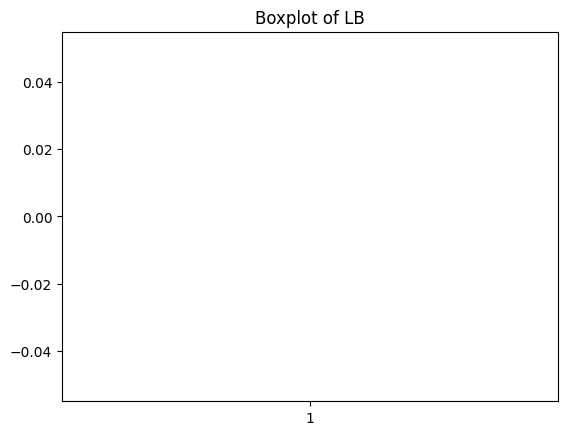

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.300380     0.003219     0.009894     0.004391     0.001895   
std      10.065733     0.004391     0.067540     0.003340     0.003343   
min      99.533136    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     167.154061     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Cardiotocographic (1) (1).csv')
def detect_outliers(df, column, method='zscore', threshold=3):
    if method == 'zscore':
        mean = df[column].mean()
        std = df[column].std()
        zscores = [(x - mean) / std for x in df[column]]
        outliers = [x for x, z in zip(df[column], zscores) if abs(z) > threshold]
    elif method == 'modified_zscore':
        median = df[column].median()
        mad = np.median([np.abs(y - median) for y in df[column]])
        modified_zscores = [0.6745 * (x - median) / mad for x in df[column]]
        outliers = [x for x, z in zip(df[column], modified_zscores) if abs(z) > threshold]
    elif method == 'iqr':
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        outliers = [x for x in df[column] if x < q1 - 1.5 * iqr or x > q3 + 1.5 * iqr]
    return outliers
outliers = detect_outliers(df, 'LB', method='zscore', threshold=3)
print(outliers)

plt.boxplot(df['LB'])
plt.title('Boxplot of LB')
plt.show()
def winsorize(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_winsorized = winsorize(df, 'LB', threshold=3)
df_no_outliers = df[~df['LB'].isin(outliers)]
print(df.describe())
print(df_winsorized.describe())
print(df_no_outliers.describe())

2.Statistical Summary

In [ ]:
import pandas as pd
df = pd.read_csv('Cardiotocographic (1) (1).csv')
summary_stats = df.describe()
print(summary_stats)

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

3.Data Visualization

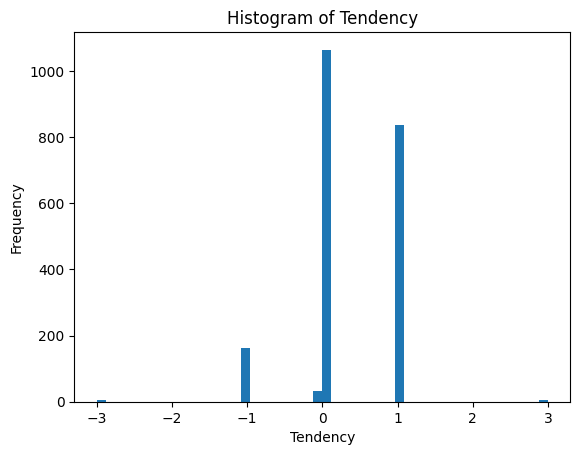

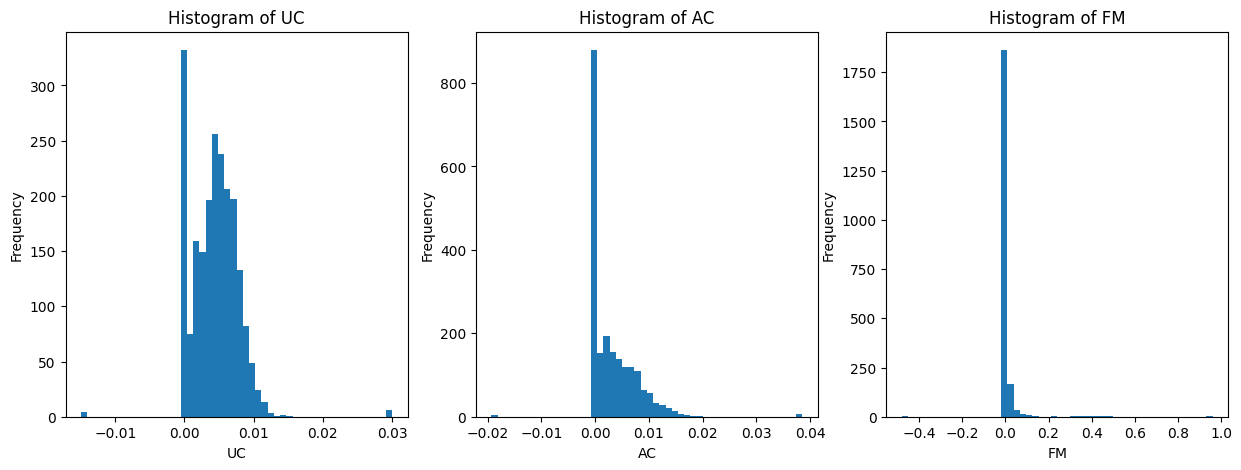

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Tendency'], bins=50)
plt.xlabel('Tendency')
plt.ylabel('Frequency')
plt.title('Histogram of Tendency')
plt.show()
variables = ['UC', 'AC', 'FM']
fig, axs = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))
for i, var in enumerate(variables):
    axs[i].hist(df[var], bins=50)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {var}')
plt.show()

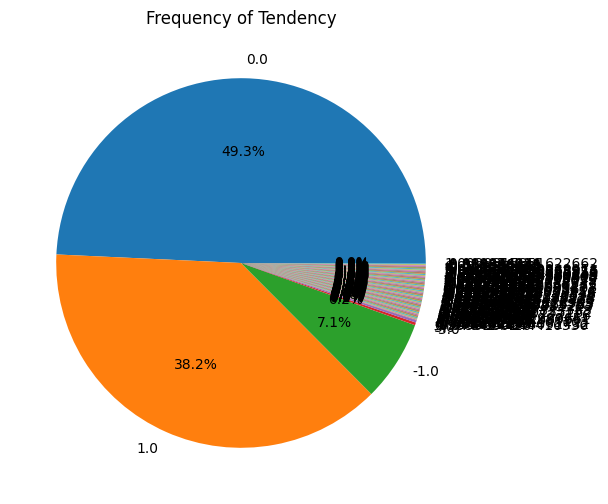

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(df['Tendency'].value_counts().values, labels=df['Tendency'].value_counts().index, autopct='%1.1f%%')
plt.title('Frequency of Tendency')
plt.show()

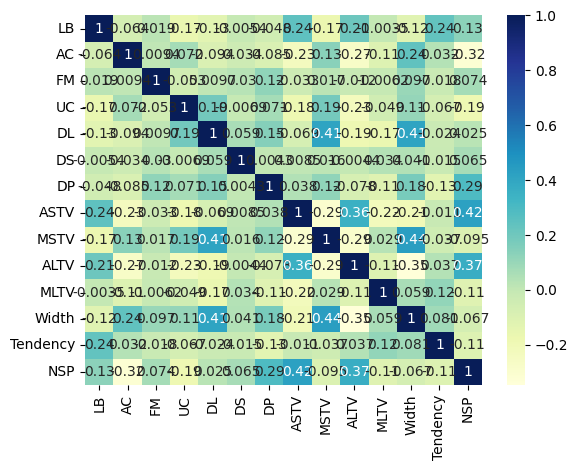

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

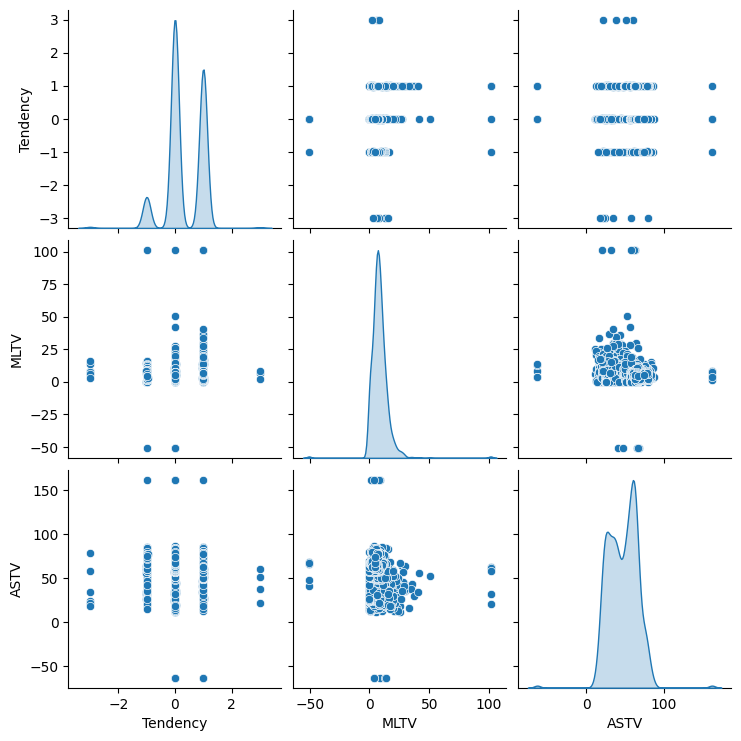

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
variables = ['Tendency', 'MLTV', 'ASTV']
sns.pairplot(df[variables], diag_kind='kde', markers='o')
plt.show()

4.Pattern recognition and insights

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

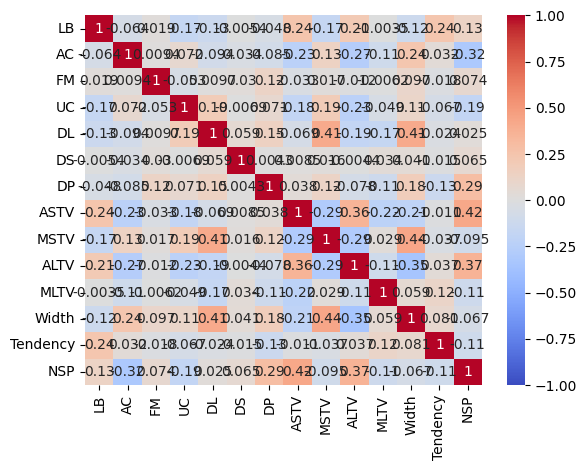

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()